### For each zipcode find which other zipcode they are most and least similar to.  Does this change over time?  If so, how.

We can think of zip code similarities on the basis of complaint type. If two zipdcodes have almost same complaint type count then probabliity of the zip code to be similar is high.
First identify top complaints in total 

In [1]:
# Load it into a Dataframe using pandas
import pandas as pd
path = 'nyc311_filter.csv'
df = pd.read_csv(path, low_memory=False, na_values = ['NO CLUE', 'N/A', '0', 'NaN'])
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,20122810,03/28/2011 11:20:53 AM,04/13/2011 10:40:27 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Address Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20122811,03/28/2011 11:12:27 PM,03/29/2011 05:07:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11216.0,644 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.690123,-73.949135,"(40.69012317171803, -73.94913492072885)"
2,20122812,03/28/2011 04:12:08 PM,03/28/2011 08:03:39 PM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Senior Address,10012.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20122813,03/28/2011 06:25:54 PM,03/28/2011 07:25:59 PM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Senior Address,10456.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20122814,03/28/2011 04:16:51 PM,03/28/2011 07:52:23 PM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,SCRIE Assistance,Senior Address,10023.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'bbl', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'vehicle_type',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'latitude', 'longitude', 'location'],
      dtype='object')

In [3]:
df.drop(df.columns[[9,10,11,12,13,14,15,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37]], axis=1, inplace=True)

In [4]:
# Drop null values from the whole dataset
df = df.dropna()

In [5]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location
1,20122811,03/28/2011 11:12:27 PM,03/29/2011 05:07:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11216.0,BROOKLYN,3.017890e+09,40.690123,-73.949135,"(40.69012317171803, -73.94913492072885)"
11,20122821,03/28/2011 10:57:31 PM,05/19/2011 01:13:06 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)"
12,20122822,03/28/2011 12:13:02 PM,05/19/2011 01:12:55 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)"
13,20122823,03/28/2011 04:23:23 PM,05/19/2011 01:13:02 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11360.0,BAYSIDE,4.058938e+09,40.779012,-73.782085,"(40.779012083546895, -73.78208491752011)"
14,20122824,03/28/2011 11:14:53 AM,04/04/2011 12:46:58 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11205.0,BROOKLYN,3.019170e+09,40.690711,-73.966360,"(40.69071138727672, -73.96636009530222)"


In [6]:
# How this change over time
# Create a function that gets the year of a datetime string
def getYear(s):
    first_split = s.split(' ')[0]
    return int(first_split.split('/')[-1])

In [7]:
# Now create a new column named year and store the values of the above function
df['created_year']= df['created_date'].apply(lambda x: getYear(x))
df['closed_year']= df['closed_date'].apply(lambda x: getYear(x))

In [8]:
# Keep only 2010 to 2018 data
df = df[df['closed_year'].isin(range(2010,2019))]

In [1]:
# Create a new csv
df.to_csv('311_cleaned_2.csv', index=False)

NameError: name 'df' is not defined

In [5]:
import pandas as pd
df = pd.read_csv('311_cleaned_2.csv')

In [6]:
# find top complaint types
top_complaint = df['complaint_type'].groupby(df['complaint_type']).count(
).sort_values(ascending=False).reset_index(name='count')
top_complaint.head()

,complaint_type,count
0,Noise Residential,1073747
1,HEATHOT WATER,983313
2,HEATING,573033
3,Blocked Driveway,551327
4,PLUMBING,492611


In [7]:
# Keep noise related data in a seperate dataframe
df_noise = df[df['complaint_type'].str.contains("Noise", na=False)]
df_noise['complaint_type'].unique()

array(['Noise  Residential', 'Noise  StreetSidewalk', 'Noise  Vehicle',
       'Noise  Commercial', 'Noise  Helicopter',
       'Noise  House of Worship', 'Noise  Park', 'Noise Survey',
       'Collection Truck Noise'], dtype=object)

In [8]:
# list the names of zips
# Create a list of unique values of districts excluding nulls
zips = [i for i in df_noise['incident_zip'].unique() if pd.notnull(i)]
print('The %d zips of NYC are: \n%s' % (len(zips), zips))

The 213 zips of NYC are: 
[10310.0, 11226.0, 11377.0, 10465.0, 11373.0, 10452.0, 11204.0, 11370.0, 10462.0, 10473.0, 11206.0, 10040.0, 11221.0, 11374.0, 10467.0, 10009.0, 10026.0, 11212.0, 10039.0, 11693.0, 11209.0, 10468.0, 10472.0, 10029.0, 11213.0, 10035.0, 10027.0, 11432.0, 10014.0, 11205.0, 10023.0, 11217.0, 10013.0, 10019.0, 10002.0, 10028.0, 11372.0, 11435.0, 11413.0, 11207.0, 11229.0, 10022.0, 11214.0, 10469.0, 11354.0, 11415.0, 10454.0, 10458.0, 10030.0, 10461.0, 11106.0, 10301.0, 11419.0, 10025.0, 10453.0, 10034.0, 11237.0, 10457.0, 10455.0, 11385.0, 10304.0, 11208.0, 10459.0, 11230.0, 10032.0, 11216.0, 11355.0, 11219.0, 11429.0, 10001.0, 11691.0, 10451.0, 11234.0, 10031.0, 10463.0, 11236.0, 11358.0, 11422.0, 10037.0, 11104.0, 10003.0, 10016.0, 11203.0, 11210.0, 11368.0, 10128.0, 11220.0, 11201.0, 10011.0, 11224.0, 10466.0, 10456.0, 11365.0, 11225.0, 11211.0, 10474.0, 11215.0, 11222.0, 11218.0, 10471.0, 11103.0, 11238.0, 11412.0, 10303.0, 10460.0, 11004.0, 11233.0, 11434.0, 1

In [9]:
noise_freq = df_noise['complaint_type'].groupby(df_noise['complaint_type']).count(
).sort_values(ascending=False).reset_index(name='count')
noise_freq

,complaint_type,count
0,Noise Residential,1073747
1,Noise Commercial,199869
2,Noise StreetSidewalk,194617
3,Noise Vehicle,79504
4,Noise Survey,13417
5,Noise Park,5064
6,Noise Helicopter,4533
7,Noise House of Worship,3962
8,Collection Truck Noise,713


In [10]:
# Save the five most significant noise incidents in a list
noise_list = list(noise_freq['complaint_type'].values)[-5:]
noise_list

['Noise Survey',
 'Noise  Park',
 'Noise  Helicopter',
 'Noise  House of Worship',
 'Collection Truck Noise']

In [11]:
#We will explore which zips have the most noise complaints.
# Keep only the Category and the zips column
df_noise_zips = df_noise.filter(items=['complaint_type', 'incident_zip'])
df_noise_zips = df_noise_zips[df_noise_zips['incident_zip'].isin(zips)]

# List the number of complaints per zips
complaint_freq_dist = df_noise_zips.groupby('incident_zip')['incident_zip'].count(
).reset_index(name='count').sort_values(by='count', ascending=0)

# Print the zips with the most noise complaints
print('The zips with the most noise complains are:\n')
complaint_freq_dist = complaint_freq_dist.reset_index().drop('index',axis=1)
complaint_freq_dist.head(10)

The zips with the most noise complains are:



,incident_zip,count
0,11226.0,36045
1,10031.0,33002
2,10467.0,31054
3,10032.0,29746
4,10040.0,29684
5,10468.0,29214
6,10034.0,26567
7,10452.0,25670
8,10456.0,25610
9,10458.0,25315


In [12]:
# Keep the most noisy districts in a seperate list.
noisy_zips = [i for i in complaint_freq_dist['incident_zip'][:10]]
print("Most noisy zips", noisy_zips)

Most noisy zips [11226.0, 10031.0, 10467.0, 10032.0, 10040.0, 10468.0, 10034.0, 10452.0, 10456.0, 10458.0]


In [13]:
#focus only on noisy zips
df_noise_focus = df_noise[df_noise['incident_zip'].isin(noisy_zips)]

In [14]:
df_noise_focus.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year
139,20123360,03/28/2011 08:53:56 AM,03/28/2011 10:40:26 AM,NYPD,New York City Police Department,Noise Residential,Loud Music/Party,Residential Building/House,11226.0,BROOKLYN,3.050820e+09,40.651624,-73.960235,"(40.65162381847338, -73.96023526159061)",2011,2011
143,20123364,03/28/2011 11:53:22 PM,03/29/2011 12:55:03 AM,NYPD,New York City Police Department,Noise Residential,Loud Music/Party,Residential Building/House,10452.0,BRONX,2.028410e+09,40.838477,-73.916792,"(40.83847687349654, -73.91679220209002)",2011,2011
149,20123369,03/29/2011 12:09:29 AM,03/29/2011 01:26:40 AM,NYPD,New York City Police Department,Noise Residential,Loud Music/Party,Residential Building/House,10040.0,NEW YORK,1.021740e+09,40.861169,-73.927678,"(40.8611692009135, -73.92767807904268)",2011,2011
154,20123374,03/28/2011 11:12:10 PM,03/29/2011 12:31:39 AM,NYPD,New York City Police Department,Noise Residential,Loud Television,Residential Building/House,10467.0,BRONX,2.043370e+09,40.858516,-73.869540,"(40.85851613343683, -73.86954011309079)",2011,2011
1014,30932618,06/25/2015 12:55:27 PM,06/25/2015 02:28:23 PM,NYPD,New York City Police Department,Noise StreetSidewalk,Loud Music/Party,Street/Sidewalk,10468.0,BRONX,2.033100e+09,40.872514,-73.887534,"(40.87251382811215, -73.88753385727848)",2015,2015


In [15]:
df_noise_focus = df_noise_focus.dropna(subset=['latitude'])
df_noise_focus = df_noise_focus.dropna(subset=['longitude'])

## Plot concentration of noise complaints with lat/long of incident

(-73.97173593629704, -73.85721528506248, 40.63438479278872, 40.886431438151796)

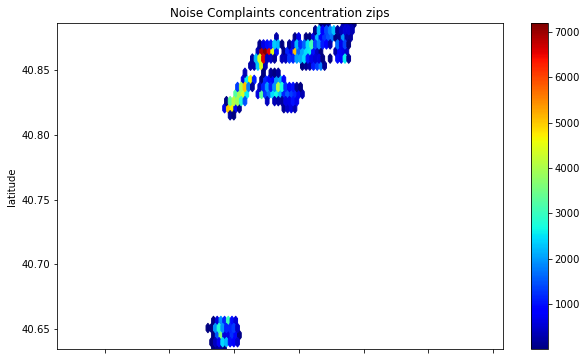

In [17]:
df_noise_focus.plot(kind='hexbin', x='longitude', y='latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Noise Complaints concentration zips', figsize=(10,6)).axis('equal')

## Observe that for a given complaint type and zip code, has the number of incidents drastically changed over year 

In [37]:
# calculate count for year 2011
df_2011 = df_noise_focus.loc[df_noise_focus['created_year'] == 2011]
complaint_zip_2011 = df_2011.groupby('incident_zip')['incident_zip'].count(
).reset_index(name='2011_count').sort_values(by='2011_count', ascending=0)

In [38]:
# calculate count for year 2015
df_2015 = df_noise_focus.loc[df_noise_focus['created_year'] == 2015]
complaint_zip_2015 = df_2015.groupby('incident_zip')['incident_zip'].count(
).reset_index(name='2015_count').sort_values(by='2015_count', ascending=0)

In [35]:
df_merge = pd.merge(complaint_zip_2011, complaint_zip_2015, on="incident_zip")
df_merge

,incident_zip,2011_count,2015_count
0,10467.0,2446,5024
1,11226.0,2313,6307
2,10032.0,2090,5301
3,10031.0,1997,5864
4,10468.0,1964,4591
5,10458.0,1849,4001
6,10456.0,1661,4465
7,10452.0,1556,4101
8,10040.0,1382,5796
9,10034.0,1128,5073


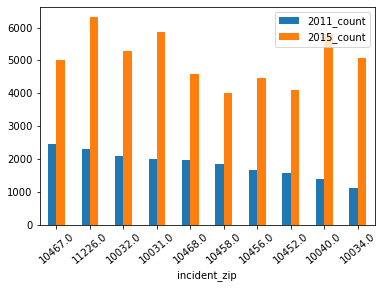

In [36]:
df_merge.plot.bar(x = 'incident_zip', y = ['2011_count', '2015_count'], rot = 40)

## We can analyse from the above bar plot the number of noise complaints have drastically increased over year( 2011 to 2015) but that similarity between zipcode hasn't changed. The zipcode 11226 and 10032 still is closer in terms of noise complaint counts

(-73.9668496318017, -73.85762727760755, 40.63470321119241, 40.88623860099504)

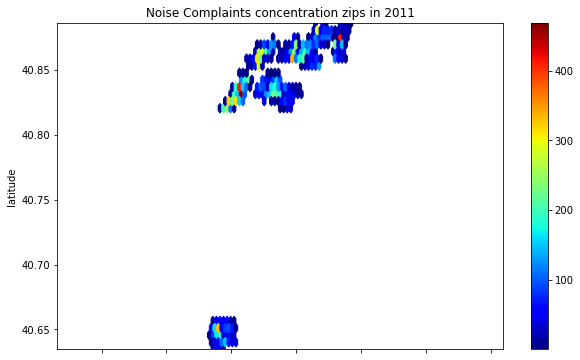

In [39]:
df_2011.plot(kind='hexbin', x='longitude', y='latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Noise Complaints concentration zips in 2011', figsize=(10,6)).axis('equal')

(-73.96707474234616, -73.85750795969527, 40.63438479278872, 40.88641491035007)

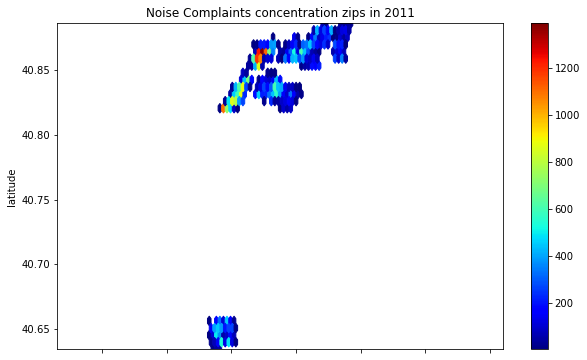

In [40]:
df_2015.plot(kind='hexbin', x='longitude', y='latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Noise Complaints concentration zips in 2011', figsize=(10,6)).axis('equal')